# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-tm

library(tm)

options(stringsAsFactors = FALSE)

Loading required package: NLP


## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 39

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))

docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 39

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

<<DocumentTermMatrix (documents: 39, terms: 10920)>>
Non-/sparse entries: 52183/373697
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs             hussein         iraq       iraqi      propose   reduction
  1981 Reagan 0.00000000 0.0000000000 0.000000000 0.0003531298 0.004743368
  1982 Reagan 0.00000000 0.0000000000 0.000000000 0.0003011194 0.002889104
  1986 Reagan 0.00000000 0.0000000000 0.000000000 0.0000000000 0.000000000
  1987 Reagan 0.00000000 0.0000000000 0.000000000 0.0008484546 0.002442161
  1988 Reagan 0.00000000 0.0000000000 0.000000000 0.0000000000 0.003096840
  2003 GWBush 0.01945612 0.0035849161 0.004416653 0.0011416318 0.000000000
  2007 GWBush 0.00000000 0.0057200535 0.006292111 0.0005692423 0.000000000
  2017 Trump  0.00000000 0.0000000000 0.000000000 0.0000000000 0.000000000
  2018 Trump  0.00000000 0.0003340228 0.000000000 0.0000000000

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

<<TermDocumentMatrix (terms: 10920, documents: 39)>>
Non-/sparse entries: 52183/373697
Sparsity           : 88%
Maximal term length: 32
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
           Docs
Terms        1981 Reagan  1982 Reagan 1986 Reagan  1987 Reagan  1988 Reagan
  hussein   0.0000000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  iraq      0.0000000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  iraqi     0.0000000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  propose   0.0003531298 0.0003011194 0.000000000 0.0008484546 0.0000000000
  reduction 0.0047433679 0.0028891041 0.000000000 0.0024421610 0.0030968396
  saddam    0.0000000000 0.0000000000 0.000000000 0.0000000000 0.0000000000
  soviet    0.0005121588 0.0021836299 0.002536664 0.0061527446 0.0009362559
  terror    0.0000000000 0.0000000000 0.001771536 0.0000000000 0.0008718071
  terrorist 0.0000000000 0.0000000000 0.000000000 0.0008

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"  "must"       "oil"        "propose"    "recovery"  
 [6] "reduction"  "soviet"     "space"      "thats"      "welfare"   
[11] "crime"      "regime"     "college"    "terrorists" "drugs"     
[16] "terror"     "kids"       "terrorist"  "hussein"    "iraq"      
[21] "saddam"     "iraqi"      "qaida"

## Visualizations

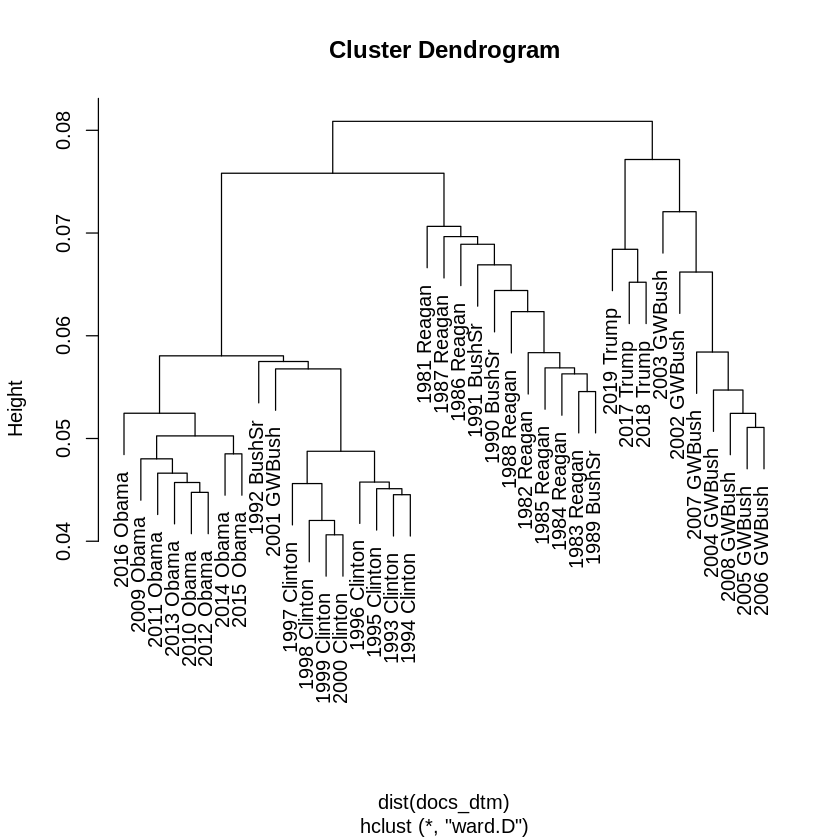

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))